# Neural Networks

## Import the data

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data preprocessing

In [98]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [99]:
print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [100]:
X_train[0] # matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

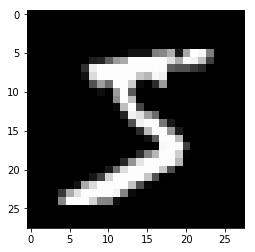

In [101]:
plt.imshow(X_train[0], cmap='gray')

In [102]:
y_train[0] # check the label

5

In [103]:
# cast the types from uint8 to float32 (to perform /)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

In [104]:
# invert colors
X_train = -(X_train - 256)
X_test = -(X_test - 256)

In [128]:
# normalize the data
X_train /= 255
X_test /= 255

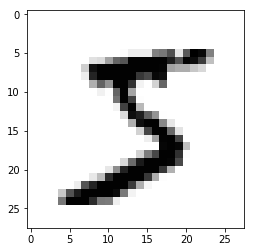

In [129]:
plt.imshow(X_train[0], cmap='gray') # now the colors are inverted!

In [130]:
# flatten the data
X_train_flat = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flat = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [131]:
# one-hot encode the labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Let's check the dimensions now!

In [132]:
print("X_train_flat.shape: {}".format(X_train_flat.shape))
print("Y_train.shape: {}".format(Y_train.shape))
print("X_test_flat.shape: {}".format(X_test_flat.shape))
print("Y_test.shape: {}".format(Y_test.shape))

X_train_flat.shape: (60000, 784)
Y_train.shape: (60000, 10)
X_test_flat.shape: (10000, 784)
Y_test.shape: (10000, 10)


## Model (sequential)

In [133]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense

In [134]:
model = Sequential() # abstract empty model

In [135]:
model.add(Dense(512, input_shape=(784,), activation='relu')) # hidden layer
model.add(Dense(512, activation='relu')) # hidden layer
model.add(Dense(10, activation='softmax')) # output layer

In [136]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [137]:
model.fit(X_train_flat, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=[X_test_flat, Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.5068 - acc: 0.8437 - val_loss: 0.2643 - val_acc: 0.9186
Epoch 2/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2531 - acc: 0.9227 - val_loss: 0.1946 - val_acc: 0.9419
Epoch 3/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.1882 - acc: 0.9427 - val_loss: 0.1476 - val_acc: 0.9540
Epoch 4/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1552 - acc: 0.9515 - val_loss: 0.1521 - val_acc: 0.9509
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.1361 - acc: 0.9572 - val_loss: 0.1783 - val_acc: 0.9450
Epoch 6/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.1212 - acc: 0.9615 - val_loss: 0.1132 - val_acc: 0.9627
Epoch 7/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.1077 - acc: 0.9660 - val_loss: 0.1292 - 

## Predicting the result

Let's take one digit

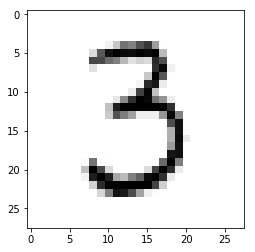

In [139]:
plt.imshow(X_train[50], cmap='gray')

...and check it's label

In [141]:
y_train[50]

3

Preprocess it

In [143]:
input_image = X_train[50].reshape(1, X_train[42].shape[0] * X_train[42].shape[1])

And get the softmax result:

In [144]:
model.predict(input_image)

array([[8.5959417e-10, 4.4687376e-06, 7.2817587e-05, 9.9986327e-01,
        1.4459895e-08, 4.8355985e-05, 1.7737206e-10, 1.1848963e-08,
        1.0597520e-05, 4.7452451e-07]], dtype=float32)

Numbers are chances related to each digit; let's get argmax to print the number

In [145]:
np.argmax(model.predict(input_image))

3

## Let's use custom images

In [163]:
from PIL import Image

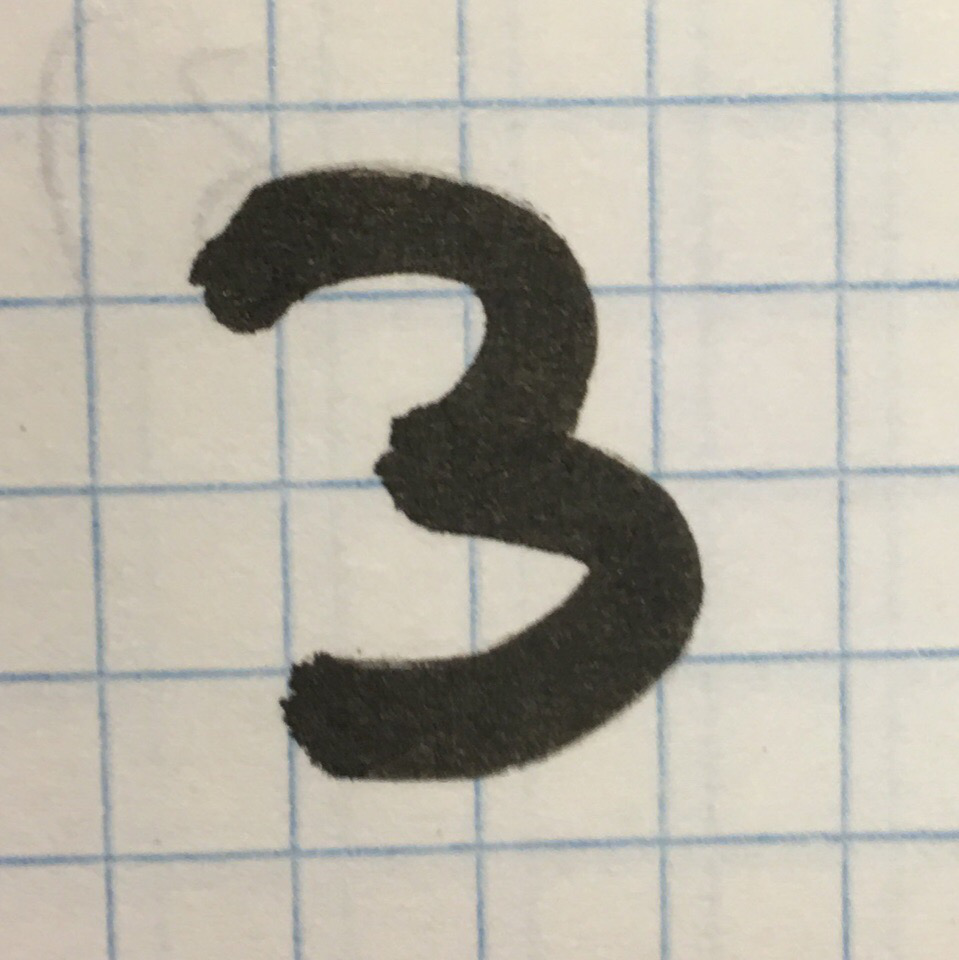

In [168]:
img = Image.open('../data/custom_data/true_real_five.jpg')
img

Let's transform image into a numpy array

In [169]:
image_array = np.array(img)

Is everything correct? Nope:

In [156]:
image_array.shape

(960, 959, 3)

Array should have a shape of (28, 28). Let's define a function to preprocess custom images:

In [157]:
def resize_image(name):
    img = Image.open(name)
    width, height = img.size # get original dimensions
    square_side = min(width, height) # get minimal dimension to be a square side

    img = img.crop((np.ceil((width - square_side)/2), 
                    np.ceil((height - square_side)/2), 
                    np.ceil((width + square_side)/2), 
                    np.ceil((height + square_side)/2))).convert('L')

    img.thumbnail((28, 28))
    np_array = np.array(img)/255
    np_array = np_array.reshape(1, np_array.shape[0] * np_array.shape[1])

    return np_array

In [170]:
X = resize_image('../data/custom_data/true_real_five.jpg')

In [172]:
np.argmax(model.predict(X))

3

## Model 

In [ ]:
inp = Input(shape=(784,)) # Our input is a 1D vector of size 784
hidden_1 = Dense(512, activation='relu')(inp) # First hidden ReLU layer
hidden_2 = Dense(512, activation='relu')(hidden_1) # Second hidden ReLU layer
out = Dense(10, activation='softmax')(hidden_2) # Output softmax layer

model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

## Real example

In [22]:
from SimpleCV import Image, Camera

cam = Camera()
img = cam.getImage()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('unit test')? (base.py, line 139)

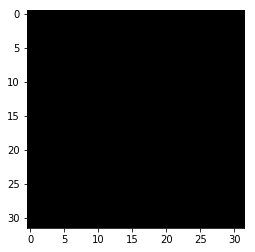

In [5]:
X_train = np.zeros((50000, 32, 32, 3))
plt.imshow(X_train[0])